<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Dictionary" data-toc-modified-id="Data-Dictionary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Dictionary</a></span></li><li><span><a href="#Acquire-df" data-toc-modified-id="Acquire-df-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Acquire df</a></span><ul class="toc-item"><li><span><a href="#DF-Info" data-toc-modified-id="DF-Info-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>DF Info</a></span></li></ul></li><li><span><a href="#Prepare-df" data-toc-modified-id="Prepare-df-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prepare df</a></span><ul class="toc-item"><li><span><a href="#Rename-Columns" data-toc-modified-id="Rename-Columns-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Rename Columns</a></span></li><li><span><a href="#Convert-date-column-to-datetime-format" data-toc-modified-id="Convert-date-column-to-datetime-format-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Convert date column to datetime format</a></span></li><li><span><a href="#Create-Date-Part-Columns" data-toc-modified-id="Create-Date-Part-Columns-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Create Date Part Columns</a></span></li><li><span><a href="#Unique-Values-in-Columns" data-toc-modified-id="Unique-Values-in-Columns-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Unique Values in Columns</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Dictionary

| Field Name | Description |
|:---------|--------:|
|ServiceDateTime  | The day the vehicle is in operation|
|Routes|Transit routes. A route is a group of trips that are displayed to riders as a single service|
|RouteName | Name of a route |
| CurrentRevenue | Revenue on a route |
| TokenCount | Token count on a route|
| TicketCount | Ticket count on a route |
| PassCount | Pass count on a route |
| BillCount | Bill count on a route |
| UnclassifiedRevenue | Unclassified revenue on a route |
| DumpCount | Cump count on a route |

## Acquire df

There was a problem reading in the original BusFareBoxActivity_2020.csv file from VIA, so I had to open it in Numbers, export the file as a new csv file, and save the new csv file over my original one provided by VIA.

In [3]:
df = pd.read_csv('BusFareBoxActivity_2020.csv')
df.head()

,ServiceDateTime,Route,RouteName,CurrentRevenue,Ridership,TokenCount,TicketCount,PassCount,BillCount,UnclassifiedRevenue,DumpCount
0,1/1/17,2,2-BLANCO RD.,510.82,1244,0,0,588,312,20.88,116
1,1/1/17,3,3-SAN PEDRO,203.93,689,0,0,371,119,9.55,49
2,1/1/17,4,4-SAN PEDRO,356.58,1377,0,0,671,230,20.44,94
3,1/1/17,5,5-MC CULLOUGH,224.80,474,0,0,239,124,19.50,64
4,1/1/17,8,8-N.ST.MARYS,252.29,471,0,0,214,147,6.45,53


### DF Info


In [6]:
print(f'Our dataframe is coming in with {df.shape[0]} rows and {df.shape[1]} columns.')

Our dataframe is coming in with 89623 rows and 11 columns.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89623 entries, 0 to 89622
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ServiceDateTime      89623 non-null  object 
 1   Route                89623 non-null  int64  
 2   RouteName            87728 non-null  object 
 3   CurrentRevenue       89623 non-null  float64
 4   Ridership            89623 non-null  int64  
 5   TokenCount           89623 non-null  int64  
 6   TicketCount          89623 non-null  int64  
 7   PassCount            89623 non-null  int64  
 8   BillCount            89623 non-null  int64  
 9   UnclassifiedRevenue  89623 non-null  float64
 10  DumpCount            89623 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 7.5+ MB


In [7]:
df.describe()

,Route,CurrentRevenue,Ridership,TokenCount,TicketCount,PassCount,BillCount,UnclassifiedRevenue,DumpCount
count,89623.000000,89623.000000,89623.000000,89623.000000,89623.0,89623.000000,89623.000000,89623.000000,89623.000000
mean,292.203028,318.322866,953.093358,3.156511,0.0,513.887730,179.312676,16.006636,77.997523
std,523.306507,290.197493,937.865204,81.232098,0.0,565.098787,163.698955,15.497742,76.630370
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,40.000000,111.195000,306.000000,0.000000,0.0,144.000000,63.000000,5.120000,23.000000
50%,94.000000,223.210000,639.000000,0.000000,0.0,312.000000,125.000000,11.230000,53.000000
75%,607.000000,443.360000,1255.000000,0.000000,0.0,670.000000,250.000000,22.210000,110.000000
max,67584.000000,2475.050000,7593.000000,6539.000000,0.0,4474.000000,1613.000000,340.820000,710.000000


## Prepare df

### Rename Columns

In [11]:
df.columns = ['date', 'route', 'route_name', 'current_revenue', 'ridership',
       'token_count', 'ticket_count', 'pass_count', 'bill_count',
       'unclassified_revenue', 'dump_count']

In [12]:
df.head(1)

,date,route,route_name,current_revenue,ridership,token_count,ticket_count,pass_count,bill_count,unclassified_revenue,dump_count
0,1/1/17,2,2-BLANCO RD.,510.82,1244,0,0,588,312,20.88,116


### Convert date column to datetime format

In [16]:
# Create a copy of the df called time and convert to a datetime index df for easy exploration

time = df.copy()
time['date'] = pd.to_datetime(time.date)
time = time.set_index('date').sort_index()

In [18]:
time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89623 entries, 2017-01-01 to 2020-01-09
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   route                 89623 non-null  int64  
 1   route_name            87728 non-null  object 
 2   current_revenue       89623 non-null  float64
 3   ridership             89623 non-null  int64  
 4   token_count           89623 non-null  int64  
 5   ticket_count          89623 non-null  int64  
 6   pass_count            89623 non-null  int64  
 7   bill_count            89623 non-null  int64  
 8   unclassified_revenue  89623 non-null  float64
 9   dump_count            89623 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 7.5+ MB


### Create Date Part Columns


In [19]:
time['month'] = time.index.month
time['year'] = time.index.year
time['day'] = time.index.day_name()

In [20]:
time.head(2)

,route,route_name,current_revenue,ridership,token_count,ticket_count,pass_count,bill_count,unclassified_revenue,dump_count,month,year,day
date,,,,,,,,,,,,,
2017-01-01,2,2-BLANCO RD.,510.82,1244,0,0,588,312,20.88,116,1,2017,Sunday
2017-01-01,3,3-SAN PEDRO,203.93,689,0,0,371,119,9.55,49,1,2017,Sunday


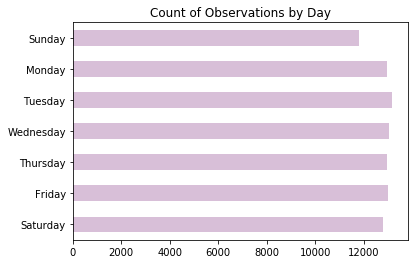

In [21]:
cats = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

time.day.value_counts().reindex(cats).plot.barh(color='thistle')

plt.title('Count of Observations by Day')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()
plt.show()

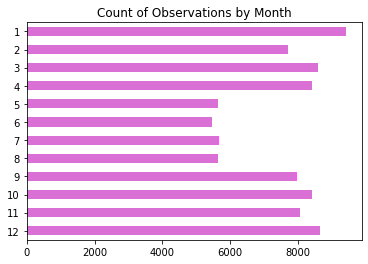

In [22]:
time.month.value_counts().sort_index().plot.barh(color='orchid')

plt.title('Count of Observations by Month')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()
plt.show()

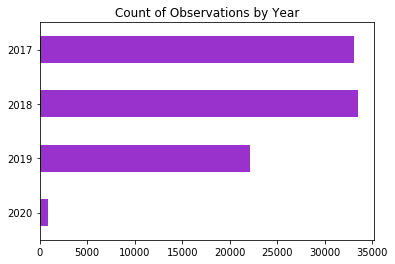

In [23]:
time.year.value_counts().sort_index().plot.barh(color='darkorchid')

plt.title('Count of Observations by Year')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()
plt.show()

### Unique Values in Columns

There are multiple names used for some of the routes. Route number can be used.

In [27]:
time.groupby(['route', 'route_name'])[['route_name']].count().head(20)

route_name
route route_name                                     
2     2-BLANCO RD.                                976
3     3-SAN PEDRO                                 365
      3-SAN PEDRO SKIP                            612
4     4-SAN PEDRO                                 976
5     5-MC CULLOUGH                               978
6     6-US 281 Express                            704
7     7 STONEOAK/DOWNTOWN EXPRESS                 430
8     8-N.ST.MARYS                                976
9     9-BROADWAY                                  977
10    10-NACO./BROAD.                             365
      10-NACO/BROADWAY /NACO PASS                 610
11    11 VIVA Culture                             611
      11-NACOGDOCHES                              365
14    14 Perrin Beitel                            611
      14-PERRIN BEITL                             365
16    16-Ft. Sam Express                          284
17    17-IH 35 Express                            610
      17-RANDOLPH P/R                             365
20    20-NEW BRAUNFELS                            976
21    21 KIRBY / CONVERSE                         611

**<font color=purple>We still see that there are 225 unique routes but only 150 unique route names. Normalization of route names needed if route name is to be used.</font>**

In [28]:
for column in time:
    print(f'There are {time[column].nunique()} unique values in the {column} column')
    print()

There are 225 unique values in the route column

There are 150 unique values in the route_name column

There are 50427 unique values in the current_revenue column

There are 4983 unique values in the ridership column

There are 347 unique values in the token_count column

There are 1 unique values in the ticket_count column

There are 3339 unique values in the pass_count column

There are 1123 unique values in the bill_count column

There are 7147 unique values in the unclassified_revenue column

There are 599 unique values in the dump_count column

There are 12 unique values in the month column

There are 4 unique values in the year column

There are 7 unique values in the day column

